### Data Science And Business Analytics Internship
<b>The Spark Foundation : #GRIPMAY21
    
<b>Author : Yash Sandeep Kadam
    
Task 1 : Prediction Using Supervised ML
Problem Statement : Predict The Percentage of a student based on the number of study hours.

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

What will be predicted score if a student studies for 9.25 hrs/ day?

### Importing all the Required Libraries

In [1]:
import pandas as pd                # used for reading dataset, manipulating and analyzing data
import numpy as np                 # library that provides a multidimensional array object
import matplotlib.pyplot as plt    # used for visualization of data
%matplotlib inline

### Reading Dataset

In [2]:
# Reading csv data from a link "http://bit.ly/w-data" given by The Spark Foundation

url = "http://bit.ly/w-data"
Student_Data = pd.read_csv(url)
print("Data imported ")



Data imported 


### Finding How many number of rows and columns

In [3]:
# we can used shape to find out no of  rows and columns
Student_Data.shape

(25, 2)

In [4]:
#Display Top 5 Records
Student_Data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
Student_Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<h3>To find there are any null values in dataset or not,we can use isnull function<h3>

In [6]:
Student_Data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Data Visualization

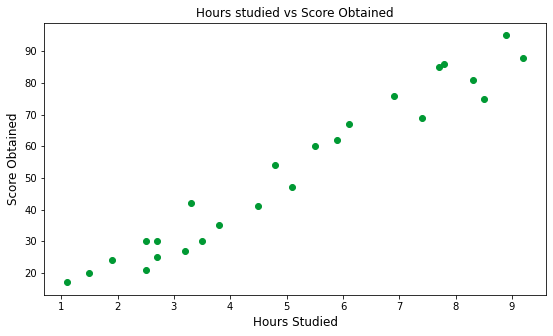

In [7]:
# plotting scatter plot for better understanding of the dataset and to know about the relation between the attributes present 
# in the dataset i.e Relation between Hours studied and Score Obtained

plt.figure(figsize=(9, 5))
plt.xlabel('Hours Studied', fontsize=12)
plt.ylabel('Score Obtained',fontsize=12)
plt.title('Hours studied vs Score Obtained',fontsize=12)
plt.scatter(Student_Data.Hours,Student_Data.Scores,color='#009933',marker='o')
plt.show()

 From these graph ,We come to know that As the number of Hours increases,the Scores also increases

In [8]:
X=Student_Data.iloc[:,:-1]
y=Student_Data.iloc[:,1]

# The features contain in X are independent and the features contain in y are dependent

# Splitting the data into train and test 

In [9]:
# train_test_split() method from model_selection module of sklearn splits the dataset into random train and test subsets


from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0) 

In [10]:
# we are going to fit our training dataset into a machine learning model to predict the output

from sklearn.linear_model import LinearRegression 

reg = LinearRegression()     
reg.fit(X_train, y_train)  

print("Training complete.")

Training complete.


In [11]:
print(reg.intercept_)

2.3708153823418883


In [12]:
print(reg.coef_)

[9.78856669]


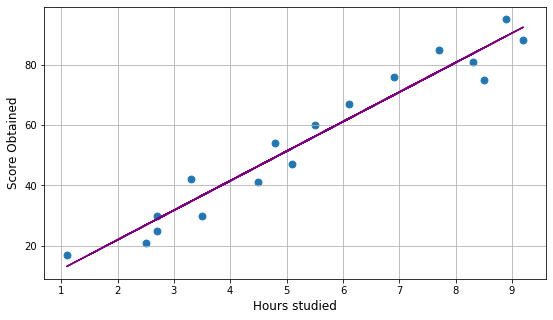

In [13]:
# Plotting the regression line
line = reg.coef_*X+reg.intercept_

# scatter plot for the training dataset
plt.figure(figsize=(9, 5))
plt.scatter(X_train, y_train,s=47)
plt.plot(X, line, color='purple',);
plt.xlabel("Hours studied", fontsize=12)
plt.ylabel("Score Obtained", fontsize=12)
plt.grid()
plt.show()

In [14]:
y_pred = reg.predict(X_test) # Predicting the score Obtained 

In [15]:
# Comparing Actual scores  vs Predicted scores
student_score_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
student_score_compare

,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


In [16]:
# goodness of the fit test
from sklearn import metrics
print("accuracy of actual and predicted r-squared : ", metrics.r2_score(y_test,y_pred))


accuracy of actual and predicted r-squared :  0.9568211104435257


<h3>As the accuracy is quite nearer to 1.0 which indicates it is a good model<h3>

In [17]:
# evaluating predictions on regression machine learning model
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error :',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.419727808027651
Mean Squared Error : 22.965097212700428
Root Mean Squared Error: 4.7921912746363144


<h3>Lower the Value of Mean Squared Error, Root Mean Squared Error and Mean Absolute Error Better is The performance of the Model<h3>

In [18]:
hours = 9.25
print("Percentage scored: ")
print(reg.predict([[hours]]))

Percentage scored: 
[92.91505723]


<h3>Conclusion:Predicted Score for the student who studies for 9.25 hrs/day is 92.91<h3>

